In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


Dataset with sentiment polarity:
     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  Polarity  
0  im getting on borderlands and i will murder yo...       0.0  
1  I am coming to the borders and I will kill you...       0.0  
2  im getting on borderlands and i will kill you ...       0.0  
3  im coming on borderlands and i will murder you...       0.0  
4  im getting on borderlands 2 and i will murder ...       0.0  


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


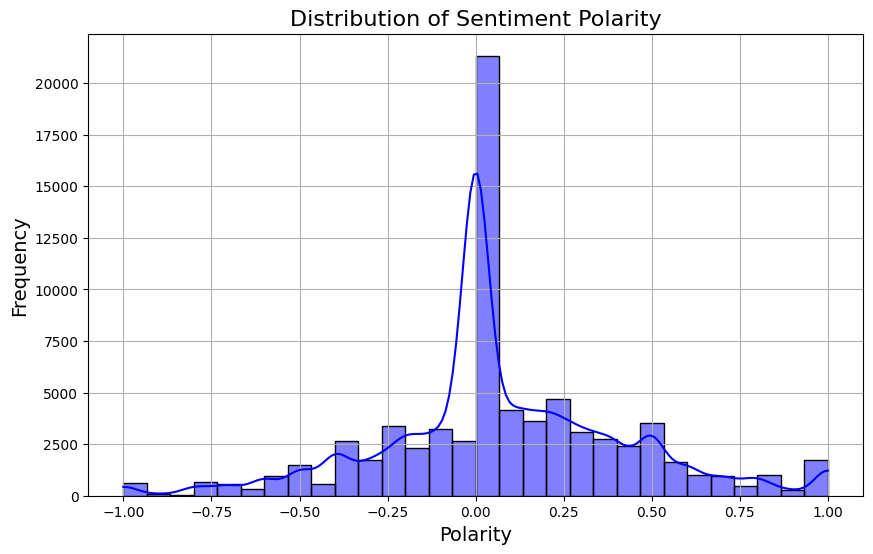

In [4]:
# Combined code for sentiment analysis
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

# Remove rows with null values in the Tweet column
df = df.dropna(subset=['Tweet'])

# Perform sentiment analysis
df['Polarity'] = df['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the first few rows with the new Polarity column
print("Dataset with sentiment polarity:")
print(df.head())

# Plot the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity', fontsize=16)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [5]:
# Classify sentiments based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Classification'] = df['Polarity'].apply(classify_sentiment)

# Count the number of tweets in each sentiment category
sentiment_counts = df['Sentiment_Classification'].value_counts()

print("Sentiment classification counts:")
print(sentiment_counts)

Sentiment classification counts:
Sentiment_Classification
Positive    34082
Negative    21352
Neutral     18562
Name: count, dtype: int64
